In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('banking.csv',header = 0)

In [3]:
print(data)

       age          job  marital            education  default housing loan  \
0       44  blue-collar  married             basic.4y  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married             basic.4y       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married             basic.4y  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  

In [4]:
data=data.dropna()
data

age          job  marital            education  default housing loan  \
0       44  blue-collar  married             basic.4y  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married             basic.4y       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married             basic.4y  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0       cellular   aug         thu  ...         1    999         0   
1       cellular   nov         fri  ...         1    999         0   
2       cellular   jun         thu  ...         3      6         2   
3       cellular   apr         fri  ...         2    999         0   
4       cellular   aug         fri  ...         1      3         1   
...          ...   ...         ...  ...       ...    ...       ...   
41183  telephone   jun         thu  ...         1    999         0   
41184  telephone   may         thu  ...         2    999         0   
41185  telephone   may         wed  ...         3    999         0   
41186  telephone   oct         tue  ...         2    999         0   
41187  telephone   may         fri  ...         4    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent          1.4          93.444          -36.1      4.963   
1      nonexistent         -0.1          93.200          -42.0      4.021   
2          success         -1.7          94.055          -39.8      0.729   
3      nonexistent         -1.8          93.075          -47.1      1.405   
4          success         -2.9          92.201          -31.4      0.869   
...            ...          ...             ...            ...        ...   
41183  nonexistent          1.4          94.465          -41.8      4.866   
41184  nonexistent          1.1          93.994          -36.4      4.860   
41185  nonexistent          1.1          93.994          -36.4      4.857   
41186  nonexistent         -3.4          92.431          -26.9      0.742   
41187  nonexistent          1.1          93.994          -36.4      4.859   

       nr_employed  y  
0           5228.1  0  
1           5195.8  0  
2           4991.6  1  
3           5099.1  0  
4           5076.2  1  
...            ... ..  
41183       5228.1  0  
41184       5191.0  0  
41185       5191.0  0  
41186       5017.5  0  
41187       5191.0  0  

[41188 rows x 21 columns]

In [5]:
print(data.shape)

(41188, 21)


In [6]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [7]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [8]:
import numpy as np
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

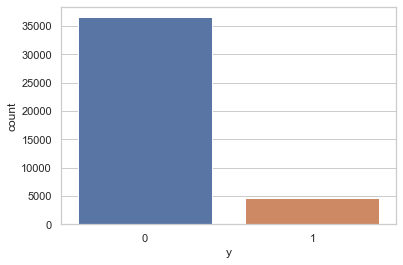

In [10]:
sns.countplot(x='y',data=data)

In [11]:
plt.show()

In [12]:
plt.savefig('count_plot')

<Figure size 432x288 with 0 Axes>

In [13]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [14]:
data.groupby('y').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
y                                                         
0       93.603757     -40.593097   3.811491  5176.166600  
1       93.354386     -39.789784   2.123135  5095.115991

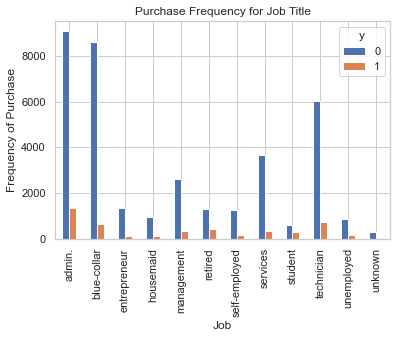

In [15]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

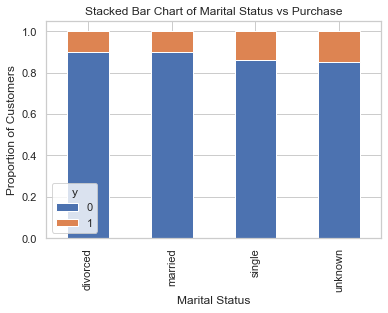

In [16]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

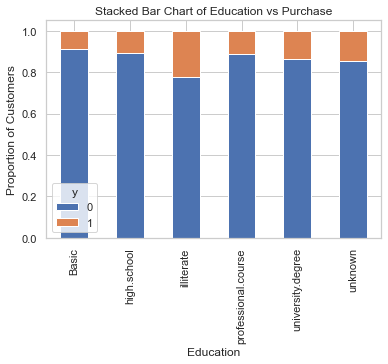

In [17]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

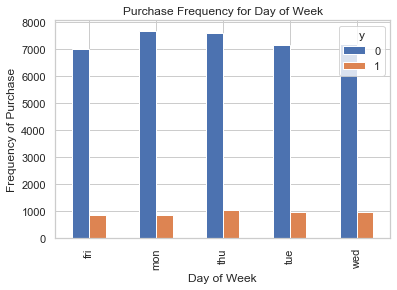

In [18]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

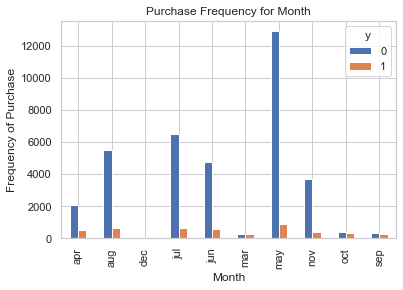

In [19]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

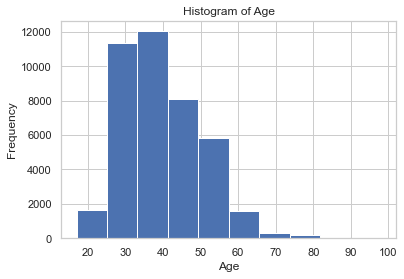

In [20]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

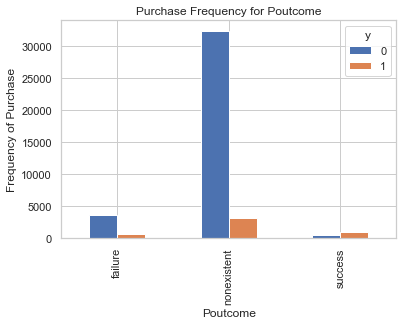

In [21]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [23]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [24]:
data

age          job  marital            education  default housing loan  \
0       44  blue-collar  married                Basic  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married                Basic       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married                Basic  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  month_oct  month_sep  \
0       cellular   aug         thu  ...          0          0   
1       cellular   nov         fri  ...          0          0   
2       cellular   jun         thu  ...          0          0   
3       cellular   apr         fri  ...          0          0   
4       cellular   aug         fri  ...          0          0   
...          ...   ...         ...  ...        ...        ...   
41183  telephone   jun         thu  ...          0          0   
41184  telephone   may         thu  ...          0          0   
41185  telephone   may         wed  ...          0          0   
41186  telephone   oct         tue  ...          1          0   
41187  telephone   may         fri  ...          0          0   

       day_of_week_fri  day_of_week_mon day_of_week_thu  day_of_week_tue  \
0                    0                0               1                0   
1                    1                0               0                0   
2                    0                0               1                0   
3                    1                0               0                0   
4                    1                0               0                0   
...                ...              ...             ...              ...   
41183                0                0               1                0   
41184                0                0               1                0   
41185                0                0               0                0   
41186                0                0               0                1   
41187                1                0               0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                    0                 0                     1   
1                    0                 0                     1   
2                    0                 0                     0   
3                    0                 0                     1   
4                    0                 0                     0   
...                ...               ...                   ...   
41183                0                 0                     1   
41184                0                 0                     1   
41185                1                 0                     1   
41186                0                 0                     1   
41187                0                 0                     1   

       poutcome_success  
0                     0  
1                     0  
2                     1  
3                     0  
4                     1  
...                 ...  
41183                 0  
41184                 0  
41185                 0  
41186                 0  
41187                 0  

[41188 rows x 72 columns]

In [25]:
data_vars=data.columns.values.tolist()

In [26]:
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month

In [27]:
to_keep=[i for i in data_vars if i not in cat_vars]

In [28]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

In [29]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [30]:
data_final

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       44       210         1    999         0           1.4          93.444   
1       53       138         1    999         0          -0.1          93.200   
2       28       339         3      6         2          -1.7          94.055   
3       39       185         2    999         0          -1.8          93.075   
4       55       137         1      3         1          -2.9          92.201   
...    ...       ...       ...    ...       ...           ...             ...   
41183   59       222         1    999         0           1.4          94.465   
41184   31       196         2    999         0           1.1          93.994   
41185   42        62         3    999         0           1.1          93.994   
41186   48       200         2    999         0          -3.4          92.431   
41187   25       112         4    999         0           1.1          93.994   

       cons_conf_idx  euribor3m  nr_employed  ...  month_oct  month_sep  \
0              -36.1      4.963       5228.1  ...          0          0   
1              -42.0      4.021       5195.8  ...          0          0   
2              -39.8      0.729       4991.6  ...          0          0   
3              -47.1      1.405       5099.1  ...          0          0   
4              -31.4      0.869       5076.2  ...          0          0   
...              ...        ...          ...  ...        ...        ...   
41183          -41.8      4.866       5228.1  ...          0          0   
41184          -36.4      4.860       5191.0  ...          0          0   
41185          -36.4      4.857       5191.0  ...          0          0   
41186          -26.9      0.742       5017.5  ...          1          0   
41187          -36.4      4.859       5191.0  ...          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                    0                0                1                0   
1                    1                0                0                0   
2                    0                0                1                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                1                0   
41184                0                0                1                0   
41185                0                0                0                0   
41186                0                0                0                1   
41187                1                0                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                    0                 0                     1   
1                    0                 0                     1   
2                    0                 0                     0   
3                    0                 0                     1   
4                    0                 0                     0   
...                ...               ...                   ...   
41183                0                 0                     1   
41184                0                 0                     1   
41185                1                 0                     1   
41186                0                 0                     1   
41187                0                 0                     1   

       poutcome_success  
0                     0  
1                     0  
2                     1  
3                     0  
4                     1  
...                 ...  
41183                 0  
41184                 0  
41185                 0  
41186                 0  
41187                 0  

[41188 rows x 62 columns]

In [31]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [32]:
columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [33]:
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

In [34]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [35]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
logreg = LogisticRegression()

In [38]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [39]:
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [40]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[37 38 31 40 33 28 30 34 36 35 15  8  9 10 14 19 13 12 18 11 17 16  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 24 20 27 22 25
 32 23 21 39 29  1  1  1  1  1  7  6 26]


In [41]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455646
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46637.9774
Date:                 2023-04-06 17:09  BIC:               46814.8215
No. Observations:     51134             Log-Likelihood:    -23299.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1613   0.0082  19.7908 0.0000  0.1454  0.1773
job_blue-collar 

In [43]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.547516
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.210     
Dependent Variable:   y                 AIC:               56025.3883
Date:                 2023-04-06 17:09  BIC:               56166.8635
No. Observations:     51134             Log-Likelihood:    -27997.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1726   0.0055  31.1231 0.0000  0.1617  0.1835
job_blue-collar 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6850  816]
 [1708 5967]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7666
           1       0.88      0.78      0.83      7675

    accuracy                           0.84     15341
   macro avg       0.84      0.84      0.83     15341
weighted avg       0.84      0.84      0.83     15341



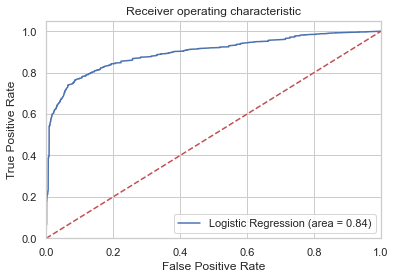

In [48]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Plotting the classification results
from mlxtend.plotting import plot_decision_regions
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25 )
# Fitting Random Forest Classifier to the Training set
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)
# Predicting the results
y_pred = model.predict(x_test)
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[4878  224]
 [ 681 4444]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5102
           1       0.95      0.87      0.91      5125

    accuracy                           0.91     10227
   macro avg       0.91      0.91      0.91     10227
weighted avg       0.91      0.91      0.91     10227

Random Forest Classification Accuracy of the model: 91.15%


In [55]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25 )
# Fitting Decision Tree Classifier to the Training set
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
model.fit(x_train, y_train)
# Predicting the results
y_pred = model.predict(x_test)
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[4894  208]
 [ 686 4439]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5102
           1       0.96      0.87      0.91      5125

    accuracy                           0.91     10227
   macro avg       0.92      0.91      0.91     10227
weighted avg       0.92      0.91      0.91     10227

Decision Tree Classification Accuracy of the model: 91.26%


In [56]:
from sklearn.neighbors import KNeighborsClassifier
# Splitting the dataset into the training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25 )
# Fitting KNN Classifier to the Training set
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)
# Predicting the results
y_pred = model.predict(x_test)
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[4841  261]
 [ 684 4441]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5102
           1       0.94      0.87      0.90      5125

    accuracy                           0.91     10227
   macro avg       0.91      0.91      0.91     10227
weighted avg       0.91      0.91      0.91     10227

KNN Classification Accuracy of the model: 90.76%


In [57]:
from sklearn.linear_model import SGDClassifier
# Selecting the features
features = ['Length',
           'TTL','Source_index','Destination_index','Source_Port','Destination_Port','y','TCP_Flags_index','Protocol_index']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 25 )
model = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('SGD Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[11534  1314]
 [ 3071  9648]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     12848
           1       0.88      0.76      0.81     12719

    accuracy                           0.83     25567
   macro avg       0.83      0.83      0.83     25567
weighted avg       0.83      0.83      0.83     25567

SGD Classifier Accuracy of the model: 82.85%


In [58]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25 )
# Fitting Naive Bayes to the Training set
model = GaussianNB()
model.fit(x_train, y_train)
# Predicting the results
y_pred = model.predict(x_test)
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Gaussian NB Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[4305  797]
 [1106 4019]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5102
           1       0.83      0.78      0.81      5125

    accuracy                           0.81     10227
   macro avg       0.82      0.81      0.81     10227
weighted avg       0.82      0.81      0.81     10227

Gaussian NB Classification Accuracy of the model: 81.39%
